In [1]:
import numpy as np
import scipy as sp
import sympy as smp
import matplotlib.pyplot as plt
from scipy.misc import derivative

x, a, b, c = smp.symbols('x a b c', real=True)

# Symbolic Case

In [3]:
x**2+smp.exp(a)

x**2 + exp(a)

In [2]:
f = smp.exp(-a*smp.sin(x**2)) * smp.sin(b**x) * smp.log(c*smp.sin(x)**2 / x)
f

exp(-a*sin(x**2))*log(c*sin(x)**2/x)*sin(b**x)

In [ ]:
# Differentiate f in respect to x

dfdx = smp.diff(f, x)
dfdx

-2*a*x*exp(-a*sin(x**2))*log(c*sin(x)**2/x)*sin(b**x)*cos(x**2) + b**x*exp(-a*sin(x**2))*log(b)*log(c*sin(x)**2/x)*cos(b**x) + x*(2*c*sin(x)*cos(x)/x - c*sin(x)**2/x**2)*exp(-a*sin(x**2))*sin(b**x)/(c*sin(x)**2)

In [4]:
# Differentiate to the nth degree
# 4th Derivative:

d4fdx4 = smp.diff(f, x, 4)
d4fdx4

(24*a*b**x*x*(b**x*sin(b**x) - cos(b**x))*(2*cos(x) - sin(x)/x)*log(b)**2*cos(x**2)/sin(x) + 8*a*b**x*x*(b**(2*x)*cos(b**x) + 3*b**x*sin(b**x) - cos(b**x))*log(b)**3*log(c*sin(x)**2/x)*cos(x**2) + 24*a*b**x*x*(2*(2*cos(x) - sin(x)/x)*cos(x)/sin(x) + 2*(sin(x)**2 - cos(x)**2 + 2*sin(x)*cos(x)/x - sin(x)**2/x**2)/sin(x) - (2*cos(x) - sin(x)/x)/x)*log(b)*cos(b**x)*cos(x**2)/sin(x) + 16*a*b**x*x*(-2*a**2*x**2*cos(x**2)**3 - 6*a*x**2*sin(x**2)*cos(x**2) + 3*a*cos(x**2)**2 + 2*x**2*cos(x**2) + 3*sin(x**2))*log(b)*log(c*sin(x)**2/x)*cos(b**x) - 12*a*b**x*(b**x*sin(b**x) - cos(b**x))*(2*a*x**2*cos(x**2)**2 + 2*x**2*sin(x**2) - cos(x**2))*log(b)**2*log(c*sin(x)**2/x) + 24*a*b**x*(2*cos(x) - sin(x)/x)*(2*a*x**2*cos(x**2)**2 + 2*x**2*sin(x**2) - cos(x**2))*log(b)*cos(b**x)/sin(x) + 16*a*x*(2*cos(x) - sin(x)/x)*(-2*a**2*x**2*cos(x**2)**3 - 6*a*x**2*sin(x**2)*cos(x**2) + 3*a*cos(x**2)**2 + 2*x**2*cos(x**2) + 3*sin(x**2))*sin(b**x)/sin(x) + 16*a*x*(-3*(2*cos(x) - sin(x)/x)*cos(x)**2/sin(x)**2 - 4*(s

In [6]:
# Compute numerically by plugging in values

d4fdx4.subs([(x,4),(a,1),(b,2),(c,3)]).evalf()

-73035.8044625845

In [7]:
# Convert a numerical function for plotting

d4fdx4_f = smp.lambdify((x, a, b, c), d4fdx4)

# Define x and y arrays
x = np.linspace(1, 2, 100)
y = d4fdx4_f(x, a=1, b=2, c=3)

x
y

array([-3.20639862e+01, -3.22345675e+01, -3.23595834e+01, -3.24421653e+01,
       -3.24857770e+01, -3.24941913e+01, -3.24714656e+01, -3.24219177e+01,
       -3.23500999e+01, -3.22607731e+01, -3.21588809e+01, -3.20495221e+01,
       -3.19379239e+01, -3.18294133e+01, -3.17293889e+01, -3.16432907e+01,
       -3.15765692e+01, -3.15346526e+01, -3.15229128e+01, -3.15466274e+01,
       -3.16109400e+01, -3.17208158e+01, -3.18809933e+01, -3.20959294e+01,
       -3.23697388e+01, -3.27061255e+01, -3.31083046e+01, -3.35789141e+01,
       -3.41199141e+01, -3.47324727e+01, -3.54168353e+01, -3.61721767e+01,
       -3.69964323e+01, -3.78861081e+01, -3.88360651e+01, -3.98392770e+01,
       -4.08865578e+01, -4.19662583e+01, -4.30639274e+01, -4.41619373e+01,
       -4.52390711e+01, -4.62700708e+01, -4.72251447e+01, -4.80694367e+01,
       -4.87624558e+01, -4.92574718e+01, -4.95008791e+01, -4.94315377e+01,
       -4.89800992e+01, -4.80683310e+01, -4.66084556e+01, -4.45025241e+01,
       -4.16418512e+01, -

Text(0.5, 0, '$x$')

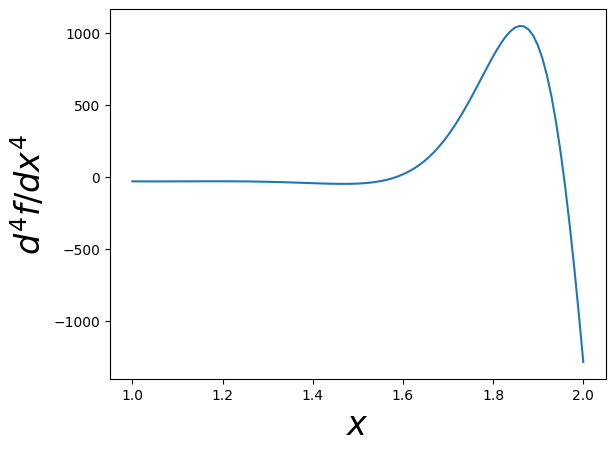

In [8]:
# Plot

plt.plot(x, y)
plt.ylabel('$d^4 f / dx^4$', fontsize = 24)
plt.xlabel('$x$', fontsize = 24)

# Quasi-Symbolic Case

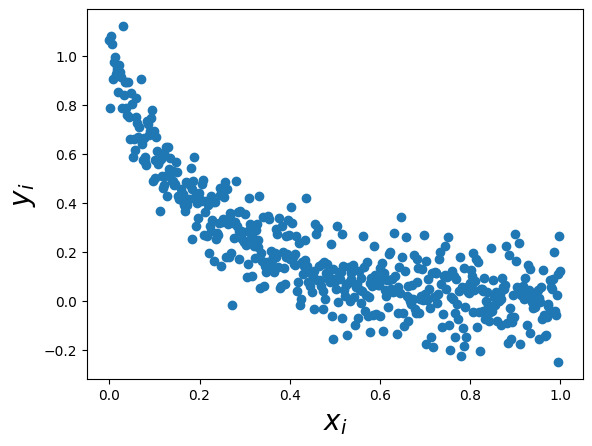

In [10]:
x = np.linspace(0, 1, 500)
y = np.exp(-x*2.15**2) + 0.1*np.random.randn(len(x))

plt.scatter(x,y)
plt.xlabel('$x_i$', fontsize=20)
plt.ylabel('$y_i$', fontsize=20)
plt.show()

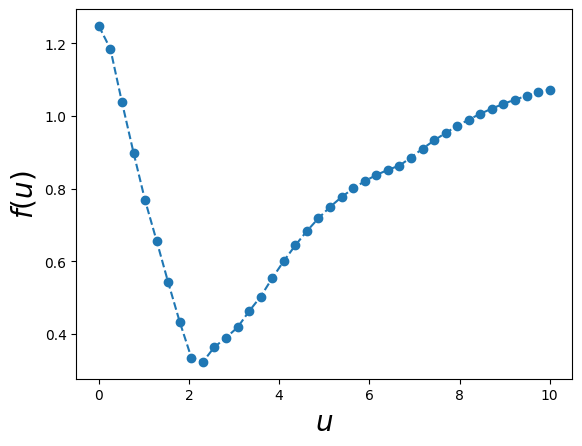

In [11]:
def f(u):
    return max(np.abs(np.exp(-x*u**2) -y))

u = np.linspace(0,10,40)
f_u = np.vectorize(f)(u)

plt.plot(u, f_u, 'o--')
plt.xlabel('$u$', fontsize=20)
plt.ylabel('$f(u)$', fontsize=20)
plt.show()

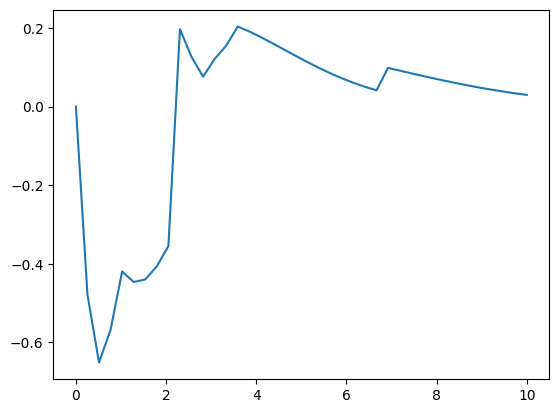

In [14]:
# Derivative

dfdu = np.vectorize(derivative)(f, u, dx=1e-6)

plt.plot(u, dfdu)